# Women's E-Commernce Clothing Reviews Analysis 

# By Mohammed Aljardat

 The goal of this project is to analyis customer reviews and through sentiment analysis predict wheather the customer liked or disliked the product

### Some code and ideas were taken from the article "Sentiment analysis for Yelp review classification" by Vivian Rajkumar
Link: https://medium.com/tensorist/classifying-yelp-reviews-using-nltk-and-scikit-learn-c58e71e962d9

## Overview

### The data set was found on Kaggle.
Link: https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews/home

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
data = pd.read_csv('//home/students/aljamo01/WomensClothingE-CommerceReviews.csv')

In [6]:
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


## Variables:<br>

Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.<br>
Age: Positive Integer variable of the reviewers age.<br>
Title: String variable for the title of the review.<br>
Review Text: String variable for the review body.<br>
Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.<br>
Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.<br>
Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.<br>
Division Name: Categorical name of the product high level division.<br>
Department Name: Categorical name of the product department name.<br>
Class Name: Categorical name of the product class name.<br>


## rows = 23486


In [7]:
data.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
Unnamed: 0                 23486 non-null int64
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


# Adding a variable for Review Length

In [9]:
data['Review Text']=data['Review Text'].astype(str)
data['Review Length']=data['Review Text'].apply(len)

In [10]:
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review Length
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,53
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,303
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,500
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,124
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,192


# Visulaizing the data

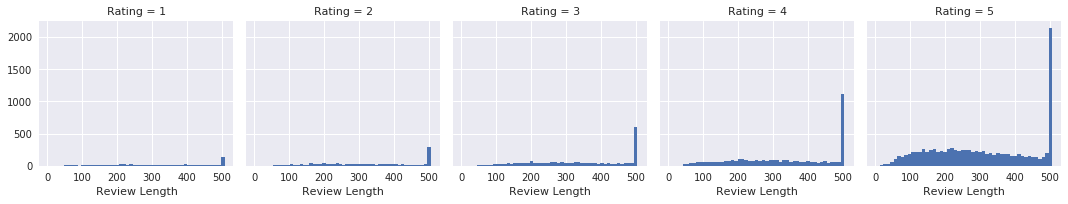

In [91]:
g = sns.FacetGrid(data=data, col='Rating')
g.map(plt.hist, 'Review Length', bins=50)

### Age distribution

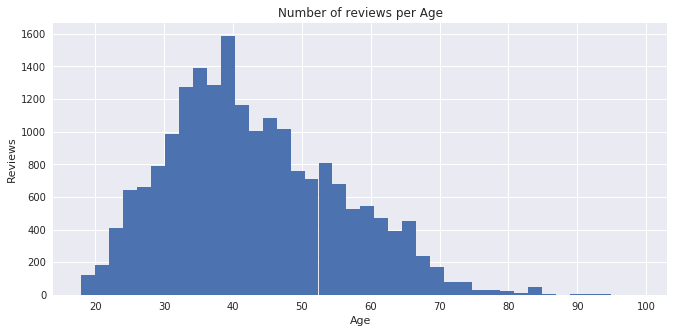

In [106]:
sns.set(rc={'figure.figsize':(11,5)})
plt.hist(data.Age, bins=40)
plt.xlabel('Age')
plt.ylabel('Reviews')
plt.title('Number of reviews per Age');

### Most popular item?

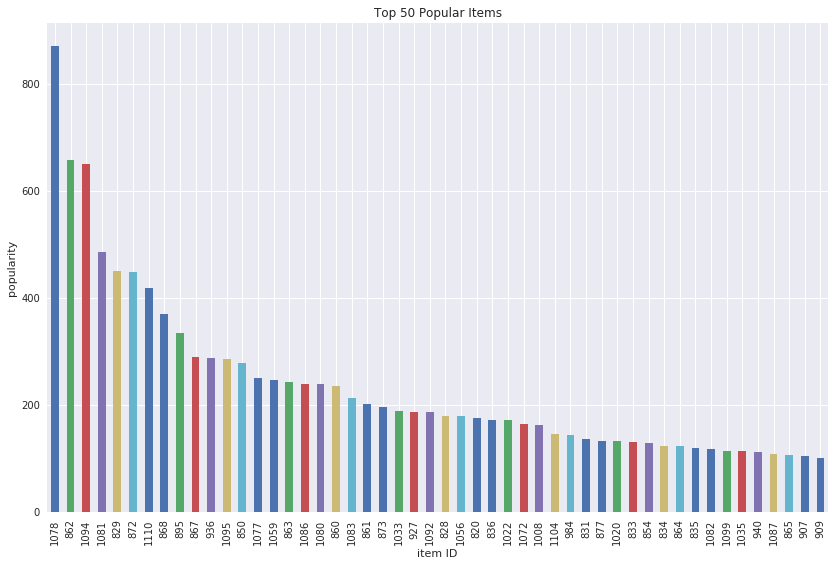

In [107]:
fig = plt.figure(figsize=(14, 9))
plt.xticks(rotation=45)
plt.xlabel('item ID')
plt.ylabel('popularity')
plt.title("Top 50 Popular Items")
data['Clothing ID'].value_counts()[:50].plot(kind='bar');

### Correlation

In [12]:
corr = data.corr()

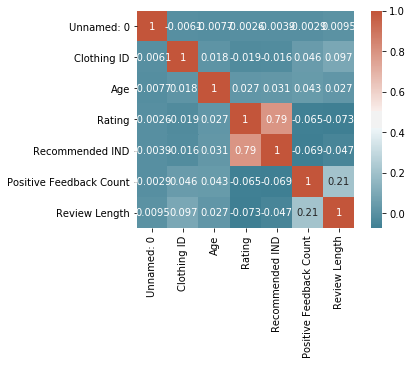

In [13]:
cmap = sns.diverging_palette(220, 20, sep=20,as_cmap=True)
sns.heatmap(data=corr, square=True,cmap=cmap, annot=True)

In [14]:
rating = data.groupby('Rating').mean()
rating.corr()

,Unnamed: 0,Clothing ID,Age,Recommended IND,Positive Feedback Count,Review Length
Unnamed: 0,1.000000,-0.529207,0.690289,-0.547077,0.512758,-0.428533
Clothing ID,-0.529207,1.000000,-0.977686,-0.303355,0.378828,0.975037
Age,0.690289,-0.977686,1.000000,0.115681,-0.194958,-0.930949
Recommended IND,-0.547077,-0.303355,0.115681,1.000000,-0.987748,-0.307808
Positive Feedback Count,0.512758,0.378828,-0.194958,-0.987748,1.000000,0.384312
Review Length,-0.428533,0.975037,-0.930949,-0.307808,0.384312,1.000000


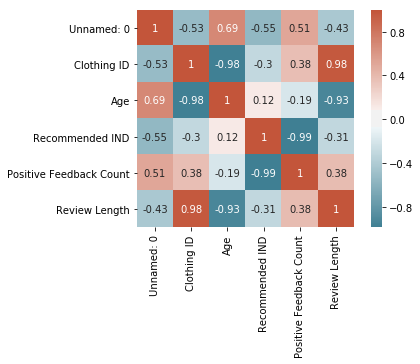

In [15]:
cmap = sns.diverging_palette(220, 20, sep=20,as_cmap=True)
sns.heatmap(data=rating.corr(), square=True,cmap=cmap, annot=True)

## EDA (Exploratory Data Analysis)

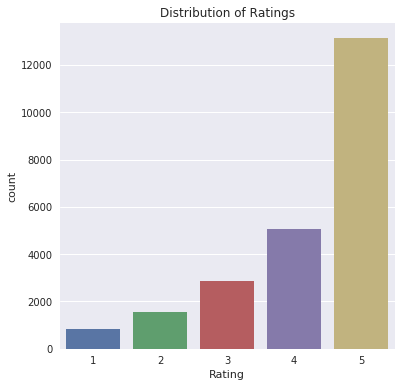

In [16]:
sns.set(rc={'figure.figsize':(6,6)})
plt.title('Distribution of Ratings')
sns.countplot(x = 'Rating', data = data);

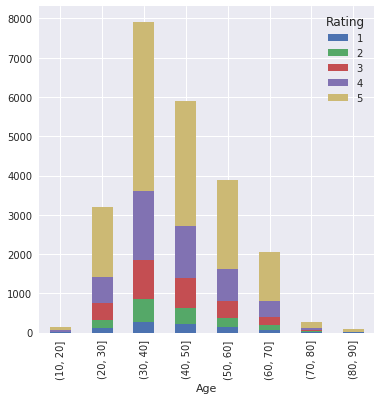

In [17]:
data.groupby(['Rating', pd.cut(data['Age'], np.arange(0,100,10))]).size().unstack(0).plot.bar(stacked=True)

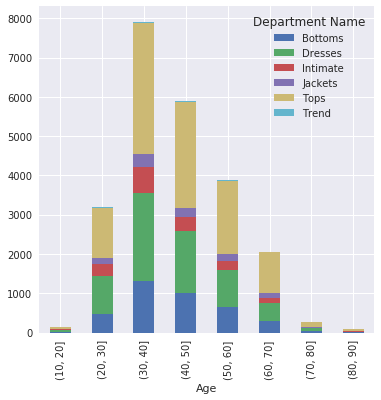

In [18]:
data.groupby(['Department Name', pd.cut(data['Age'], np.arange(0,100,10))]).size().unstack(0).plot.bar(stacked=True)

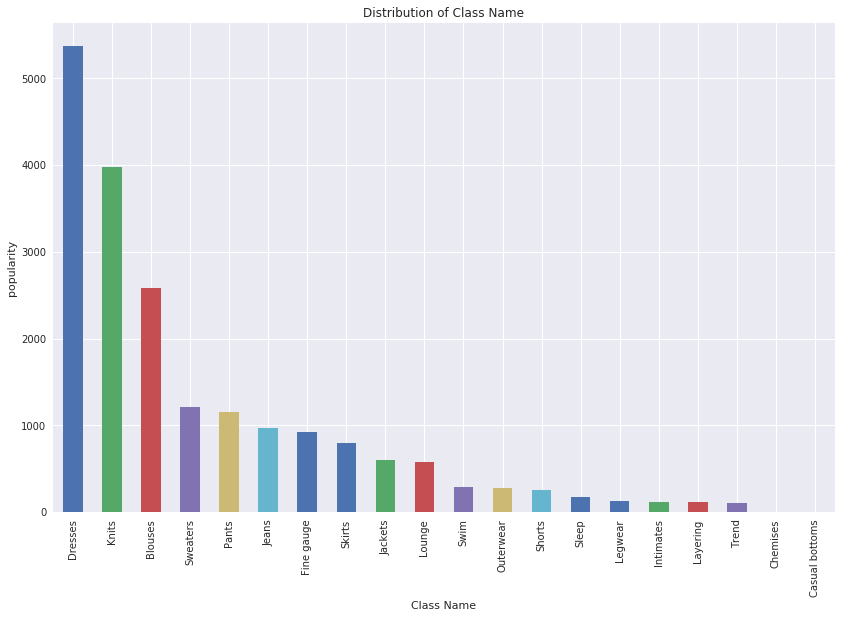

In [110]:
fig = plt.figure(figsize=(14, 9))
plt.xticks(rotation=45)
plt.xlabel('Class Name')
plt.ylabel('popularity')
plt.title("Distribution of Class Name")
data['Class Name'].value_counts().plot(kind='bar');

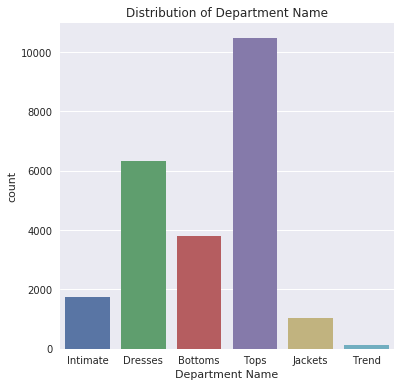

In [19]:
sns.set(rc={'figure.figsize':(6,6)})
plt.title('Distribution of Department Name')
sns.countplot(x = 'Department Name', data = data);

### plots of the most Recommended and not Recommended item 


In [118]:
recommended = data[data['Recommended IND']==1]
not_recommended = data[data['Recommended IND']==0]

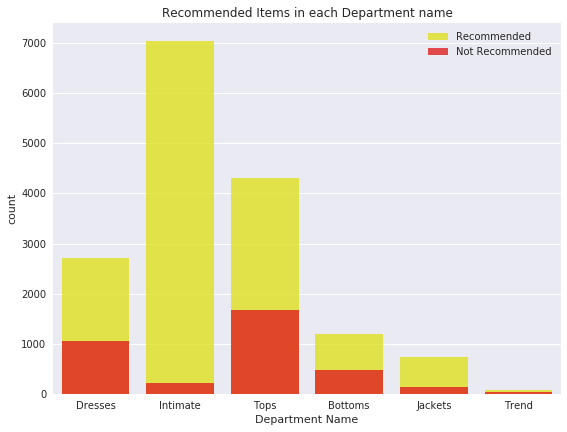

In [119]:
ax2 = plt.subplot2grid((2,2),(0,0))
ax2 = sns.countplot(recommended['Department Name'] , color="yellow",alpha=0.8,label="Recommended")
ax2 = sns.countplot(not_recommended['Department Name'] , color="red",alpha=0.8,label="Not Recommended")
ax2 = plt.title("Recommended Items in each Department name")
ax2 = plt.legend()

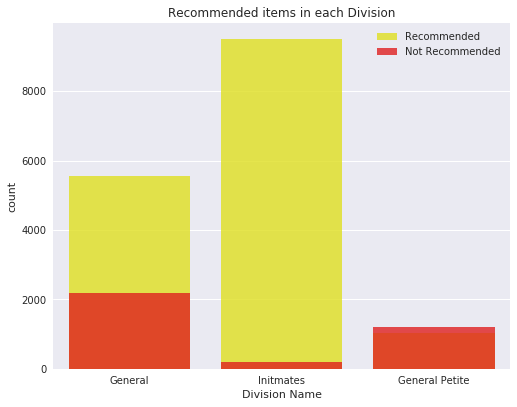

In [132]:
fig = plt.figure(figsize=(18,14))
ax1 = plt.subplot2grid((2,2),(0,0))
ax1 = sns.countplot(recommended['Division Name'],color="yellow",alpha=0.8,label="Recommended")
ax1 = sns.countplot(not_recommended['Division Name'],color="red",alpha=0.8,label="Not Recommended")
ax1 = plt.title("Recommended items in each Division")
ax1 = plt.legend()

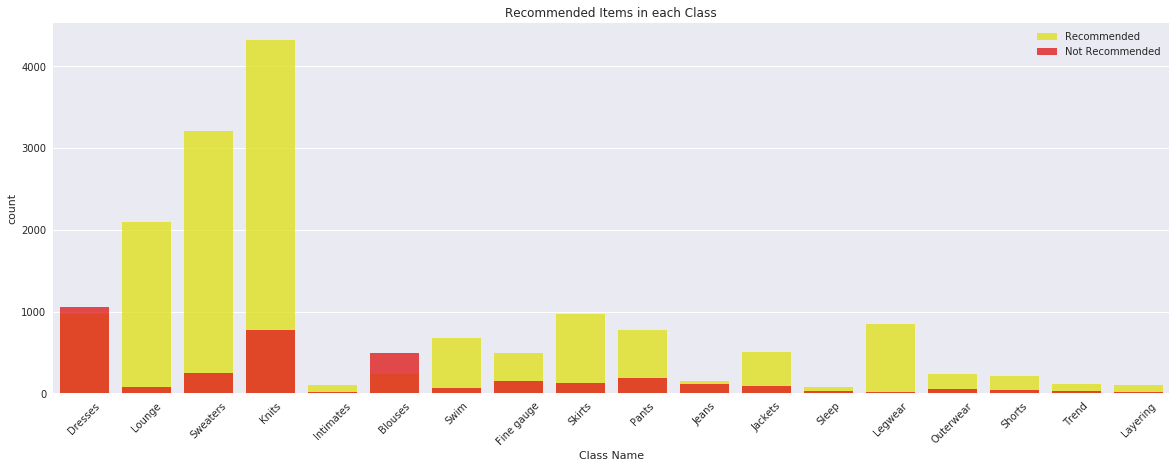

In [131]:
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax3 = plt.xticks(rotation=45)
ax3 = sns.countplot(recommended['Class Name'], color="yellow", alpha = 0.8, label = "Recommended")
ax3 = sns.countplot(not_recommended['Class Name'], color="red", alpha = 0.8, label = "Not Recommended")
ax3 = plt.title("Recommended Items in each Class")
ax3 = plt.legend()

# Sentiment Analysis: Positive or Negative?!?

Using the TextBlob modules we can determine the polarity of each review (if 1=> polarity >0 then it is a positive review and if 0> polarity >= -1 then it is a negative review.

In [20]:
from textblob import TextBlob
testimonial = TextBlob("Textblob is amazingly simple to use. What great fun!")
testimonial.sentiment
#testimonial.sentiment.polarity

Sentiment(polarity=0.39166666666666666, subjectivity=0.4357142857142857)

In [133]:
from textblob import TextBlob
testimonial = TextBlob("Textblob is bad, simple to use. What a wrong choise!")
testimonial.sentiment

Sentiment(polarity=-0.4416666666666666, subjectivity=0.6412698412698412)

In [22]:
bloblist = list()
reviews = data['Review Text'].astype(str)
for row in reviews:
    blobanalysis= TextBlob(row)
    bloblist.append((row,blobanalysis.sentiment.polarity, blobanalysis.sentiment.subjectivity))
    df_sentiment= pd.DataFrame (bloblist, columns = ['Review','sentiment','polarity'])

In [23]:
df_sentiment.head()

,Review,sentiment,polarity
0,Absolutely wonderful - silky and sexy and comf...,0.633333,0.933333
1,Love this dress! it's sooo pretty. i happene...,0.339583,0.725000
2,I had such high hopes for this dress and reall...,0.073675,0.356294
3,"I love, love, love this jumpsuit. it's fun, fl...",0.550000,0.625000
4,This shirt is very flattering to all due to th...,0.512891,0.568750


In [24]:
def sentiment_type(df_sentiment):
    if df_sentiment['sentiment'] > 0:
        val = "Positive Review"
    elif df_sentiment['sentiment'] == 0:
        val = "Neutral Review"
    else:
        val = "Negative Review"
    return val

df_sentiment['Sentiment_Type'] = df_sentiment.apply(sentiment_type, axis=1)

In [25]:
df_sentiment.head()

,Review,sentiment,polarity,Sentiment_Type
0,Absolutely wonderful - silky and sexy and comf...,0.633333,0.933333,Positive Review
1,Love this dress! it's sooo pretty. i happene...,0.339583,0.725000,Positive Review
2,I had such high hopes for this dress and reall...,0.073675,0.356294,Positive Review
3,"I love, love, love this jumpsuit. it's fun, fl...",0.550000,0.625000,Positive Review
4,This shirt is very flattering to all due to th...,0.512891,0.568750,Positive Review


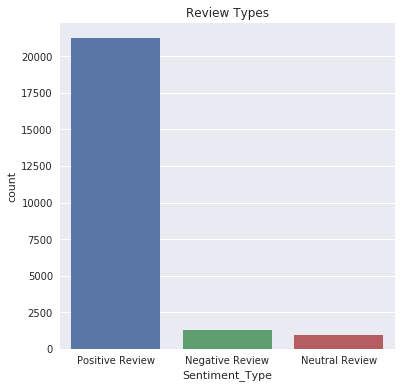

In [26]:
sns.set(rc={'figure.figsize':(6,6)})
plt.title('Review Types')
sns.countplot(x = 'Sentiment_Type', data = df_sentiment);

## Wordcloud visulaization

In [27]:
positive_reviews=df_sentiment[df_sentiment['Sentiment_Type']=='Positive Review']
negative_reviews=df_sentiment[df_sentiment['Sentiment_Type']=='Negative Review']

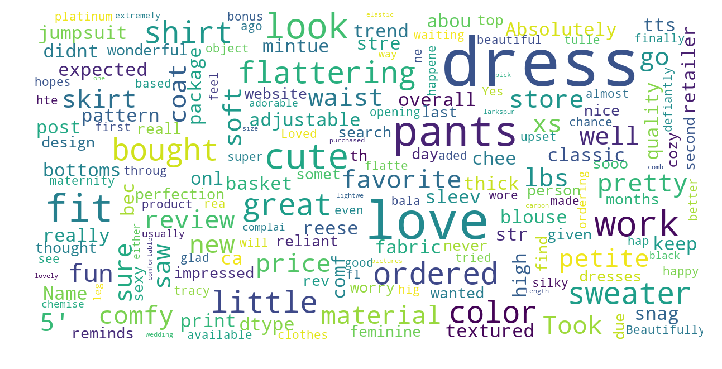

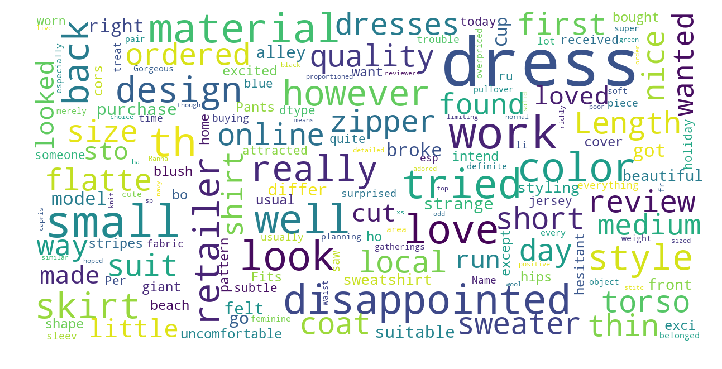

In [28]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(positive_reviews['Review'])
show_wordcloud(negative_reviews['Review'])


## Clean reviews from punctuations, convert a word into lower case, and remove the stopwords from the sentence.

In [59]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
import re
import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return [word for word in text.split() if word.lower() not in stopwords.words('english')]

In [62]:
data['Review Text'].head(5).apply(remove_punctuations)

0    [Absolutely, wonderful, silky, sexy, comfortable]
1    [Love, dress, sooo, pretty, happened, find, st...
2    [high, hopes, dress, really, wanted, work, ini...
3    [love, love, love, jumpsuit, fun, flirty, fabu...
4    [shirt, flattering, due, adjustable, front, ti...
Name: Review Text, dtype: object

# Vectorization

At this moment, we have our review text column as a token (which has no punctuations and stopwords). We can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review. See figure below to undersand how vectorization works.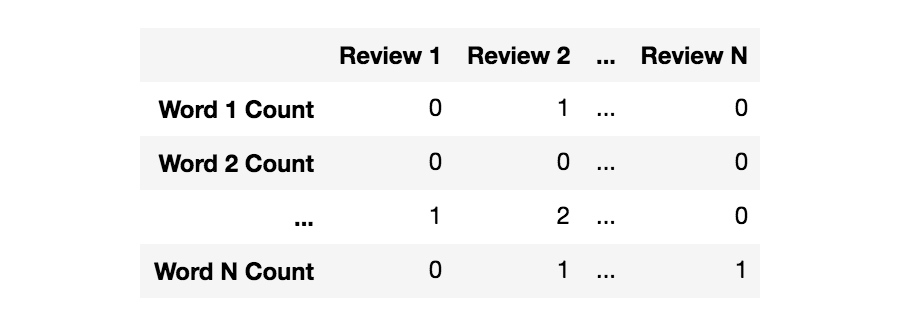

In [74]:
data=data.dropna(axis=0,how='any')
rating_df = data[(data['Rating'] == 1) | (data['Rating'] == 5)]
X_review=rating_df['Review Text']
y_rating=rating_df['Rating']

In [75]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer=CountVectorizer(analyzer=text_process).fit(X_review)

In [76]:
print(len(bow_transformer.vocabulary_))

13953


In [77]:
X_review = bow_transformer.transform(X_review)

# Classification

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_review,y_rating,test_size=0.2,random_state=2018)

In [79]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [80]:
y_pred = nb.predict(X_test)

In [84]:
from sklearn.metrics import accuracy_score
b_ac = accuracy_score(y_test, y_pred)
b_ac

0.9536796536796537

In [103]:
print('\n')
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print('\n')
binary = classification_report(y_test, y_pred)
print(binary)



[[  54  100]
 [   7 2149]]


             precision    recall  f1-score   support

          1       0.89      0.35      0.50       154
          5       0.96      1.00      0.98      2156

avg / total       0.95      0.95      0.94      2310



## 95% prediction accuracy, now we can predict if the customer liked the product or not based on the review.